# DBSCAN

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import dbscan
from sklearn.datasets import make_blobs

from queue import Queue

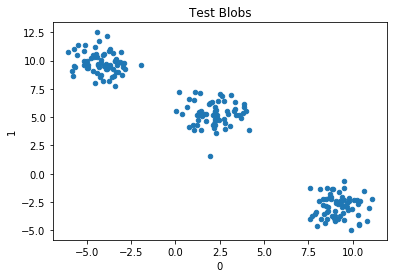

In [120]:
# Create Blobs
df = pd.DataFrame(make_blobs(200)[0])

df.plot(
    x=0, 
    y=1, 
    kind="scatter",
    title="Test Blobs"
)
plt.show()

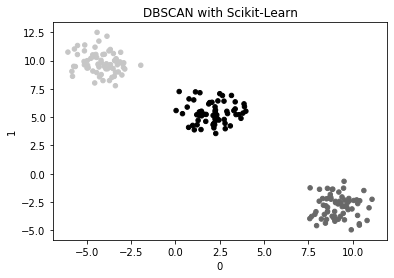

In [121]:
# Create labels using DBSCAN
df["labels"] = dbscan(df, 1, 5)[1]

# Plot the labels
df.plot(
    x=0,
    y=1,
    kind="scatter",
    title="DBSCAN with Scikit-Learn",
    c="labels",
    colorbar=False
)

plt.show()

In [163]:
# Implement by hand

class dbscan2():
    def __init__(self,df, epsilon=1, min_points=5):
        self.df = df
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        
    def fit(self):
        "Fit the data"
        
        # Create labels column initialized to -1 (unclassified)
        self.df["labels"] = -1
        
        for x in range(len(self.df)):
            
            # if the point is not labled already then search for neighbors
            if self.df["labels"][x] != -1:
                continue
            
            # find neighbors
            p = self.df.iloc[x,:2]
            neighbors = self.rangeQuery(p)
            
            # If less neighbors than min_points then label as noise and continue
            if len(neighbors) < self.min_points:
                self.df.iloc[x,2] = self.noise
                continue
                
            # increment cluster label
            self.cluster_label += 1

            # set current row to new cluster label
            self.df.iloc[x,2] = self.cluster_label

            # create seed set to hold all neighbors of cluster including the neighbors already found
            found_neighbors = neighbors
            
            # create Queue to fold all neighbors of cluster
            q = Queue()
            
            # add original neighbors
            for x in neighbors:
                q.put(x)
            
            # While isnt empty label new neighbors to cluster
            while q.empty() == False:
                
                current = q.get()
                
                # if cur_row labled noise then change to cluster label (border point)
                if self.df["labels"].iloc[current] == 0:
                    self.df["labels"].iloc[current] = self.cluster_label

                # If label is not -1(unclassified) then continue
                if self.df["labels"].iloc[current] != -1:
                    continue
                    
                # label the neighbor
                self.df["labels"].iloc[current] = self.cluster_label

                # look for neightbors of cur_row
                point = self.df.iloc[current]
                neighbors2 = self.rangeQuery(point)
                
                # if neighbors2 >= min_points then add those neighbors to seed_set
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x)                           
    
    def predict(self, x):
        "Return the predicted labels"
        
        x = x.values
        
        preds = []
        
        for point in x:
            neighbors = self.rangeQuery(point)
            label = self.df["labels"][neighbors[0]]
            preds.append(label)
        
        return preds
    
    def rangeQuery(self, x):
        """Query database against x and return all points that are <= epsilon"""
        
        neighbors = []
        
        for y in range(len(self.df)):
            q = self.df.iloc[y, :2]
            if self.dist(x, q) <= self.epsilon:
                neighbors.append(y)
        
        return neighbors
    
    def dist(self, point1, point2):
        """Euclid distance function"""
        
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]
        
        # create the points 
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2)

test = dbscan2(df, 1, 5)
test.fit()

/Users/mph/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


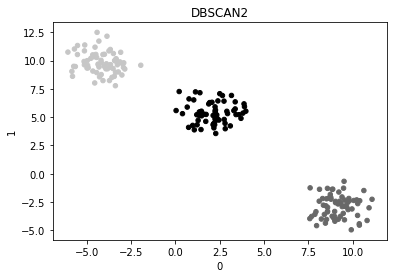

In [164]:
test.df.plot(
    x=0,
    y=1,
    kind="scatter",
    title="DBSCAN2",
    c="labels",
    colorbar=False
)

plt.show()

In [165]:
# Check labels of dbscan 2
test.df["labels"].value_counts()

2    67
1    67
3    64
0     2
Name: labels, dtype: int64

In [168]:
# Check labels of scikit-learn dbscan
df["labels"].value_counts()

2    67
1    67
3    64
0     2
Name: labels, dtype: int64

In [169]:
# Predict first 5 rows label
test.predict(df.iloc[:5, :2])

[1, 1, 2, 2, 0]

In [171]:
# Check against train df
df.head()

,0,1,labels
0,-4.010581,10.557479,1
1,-5.139746,10.858255,1
2,8.493605,-2.834445,2
3,9.710076,-2.560751,2
4,1.968156,1.580349,0
